In [1]:
import matplotlib.pyplot as plt
import numpy as np
import unittest

In [ ]:

def PoissonTests(unittest.TestCase):
    
    def test_unit_square(self):
        
        
        



(0.0, 0.0, 1.0, 1.0)

In [208]:
def slow_laplace_solver(nsamples, poissonify=False):
    '''
    Solve Laplace's equation very slowly at a single 2D point given by
    (0, 0)
    
    on the unit rectangle centered at the origin.
    '''
    
    origin = [0., 0.]
    
    def collision_unit_square(path):
        # path should be a 2D point.
        if abs(path[0]) > 0.1 or abs(path[1]) > 0.1:
            return True
        return False
    
    
    # Stolen from Chati's paper, eq'n 35
    g = lambda x, y: x ** 3 + y ** 3 - 3. * (x ** 2) * y - 3. * (y ** 2) * x + 10.
    #f = None
    # use only for testing poisson's equation
    #if poissonify:
    #g = lambda x, y: x ** 2 + y ** 2
    #f = lambda x, y: 4.
    
    # Main loop.
    total = 0.
    for i in range(nsamples):
        total += slow_laplace_stepper(origin, collision_unit_square, g)
    return total / nsamples

def slow_laplace_stepper(origin, collision, g, dt=0.001):
    '''
    Solve Laplace's equation very slowly at a single 2D point 
    <origin>
    
    with boundary given by <collision>
    and boundary function given by <g>
    '''
    N = 500 # bulk-sample to reduce function call overhead
    
    mean = [0., 0.]
    cov = np.eye(2, 2) * np.sqrt(dt)
    x, y = np.random.multivariate_normal(mean, cov, N).T
    
    path = origin
    i = 0
    
    value = 0
    time = 0
    while not collision(path):
        #if poissonify:
        # Use trapezoid quadrature rule
        #value += 0.5 * (f(path[0], path[1]) + f(path[0] + x[i], path[1] + y[i]))
                                 
        path[0] += x[i]
        path[1] += y[i]
                
        # Refresh random sample values (independent from rest of update)
        i += 1
        if i % N == 0:
            i = 0
            x, y = np.random.multivariate_normal(mean, cov, N).T
    
    # Use the last collision point as an approximation (fix this by taking average later)
    
    #value *= dt
    #return 2. * time + g(path[0], path[1])
    return g(path[0], path[1])
        
    
    
#slow_laplace_solver(10000) # The exact solution is 3.

slow_laplace_solver(10000) # The exact solution is 0.
# Something I noticed: the random walk does better when the box is really small.

10.004080412127454

In [204]:
# Random walk on a box.

dt = 0.001

mean = [0, 0]
cov = np.eye(2, 2) * np.sqrt(dt)

x, y = np.random.multivariate_normal(mean, cov, 500).T

path = np.cumsum(x), np.cumsum(y)


stop_index = min( np.argmax( np.abs(path[0]) > 2 ) , np.argmax( np.abs(path[1]) > 2 ))
if stop_index == 0:
    stop_index = -1

71
[ 0.19222596  0.35736051  0.08395801  0.22278508 -0.12489297] [0.16670575 0.31332964 0.29707258 0.52344761 0.58049067]


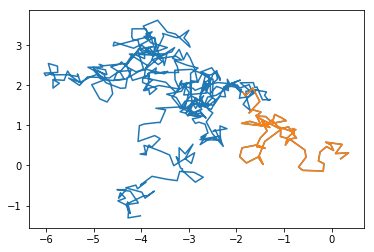

In [89]:
fig, ax = plt.subplots(1,1)

ax.plot(path[0], path[1])

ax.plot(path[0][:stop_index], path[1][:stop_index])
print(stop_index)

print(path[0][0:5], path[1][0:5])

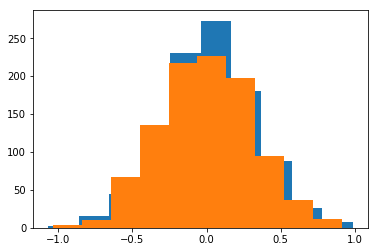

In [63]:
plt.hist(x)
plt.hist(y)
plt.show()

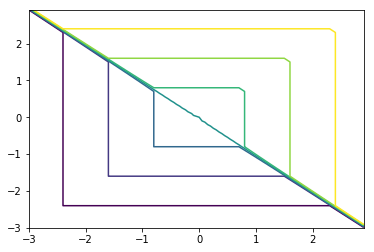

In [64]:
xlim, ylim = 3., 3.
x, y = np.arange(-xlim, xlim, 0.1), np.arange(-ylim, ylim, 0.1)
X, Y = np.meshgrid(x, y)

plt.contour(X, Y, np.where(np.abs(X) > np.abs(Y), X, Y))

# Oops.

In [69]:
vv = np.logical_or( np.abs(path[0]) > 1, np.abs(path[1]) > 1 )



(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         15,  16,  17,  18,  19,  21,  24,  25,  26,  28,  76,  77,  78,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 110, 116, 117, 118, 120, 121]),)

0.49900050000000007

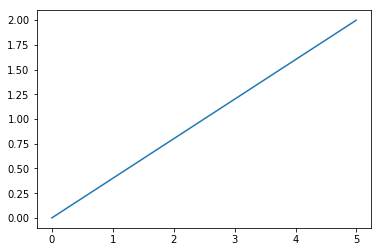

In [135]:



# Numerical quadrature...?

dt = 0.001
t = np.arange(0, 1, dt)
x, y = 5 * t, 2 * t


X, Y = np.meshgrid(x, y)

plt.plot(x, y)

f = lambda x, y: x

vals = 0
for i in range(len(t) - 1):
    vals += 0.5 * ( f(x[i], y[i]) + f(x[i + 1], y[i + 1]))
vals * dt

vals = 0
for i in range(len(t) - 1):
    vals += 0.5 * (t[i] + t[i + 1])
vals * dt